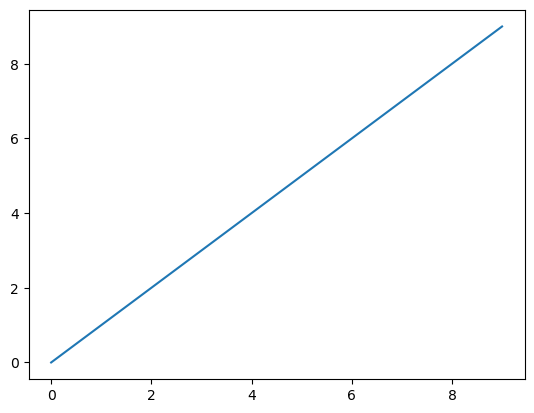

In [1]:
# you can test that everything is working by making a simple plot:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(10))
plt.show()

In [2]:
# Figures and Subplots

# Plots in matplotlib reside within a Figure object. You can create a new figure with
#  plt.figure:

fig=plt.figure(2)

# You can get a reference to the
#  active figure using plt.gcf().

plt.gcf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
# You can’t make a plot with a blank figure. You have to create one or more subplots
#  using add_subplot:

ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# It should print empty plots

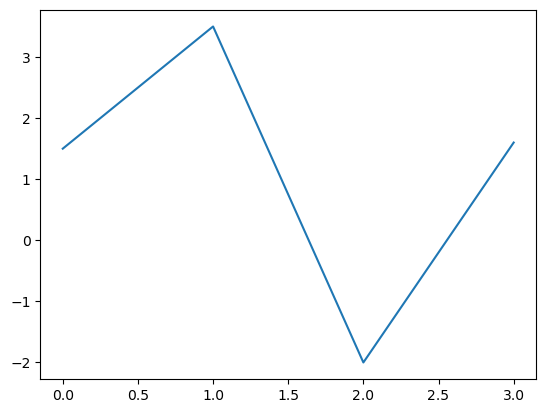

In [4]:
plt.plot([1.5, 3.5, -2, 1.6])

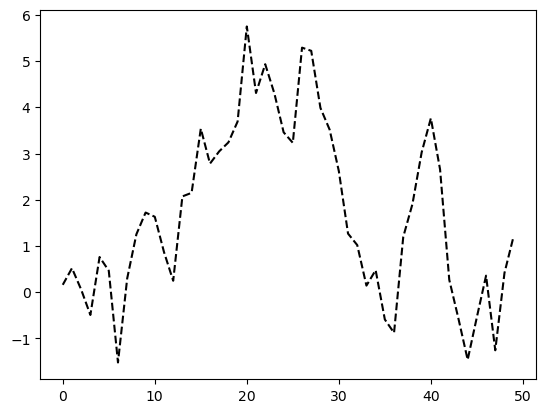

In [5]:
from numpy.random import randn

plt.plot(randn(50).cumsum(),'k--')
#  The 'k--' is a style option instructing matplotlib to plot a black dashed line.


In [6]:
x = np.arange(10)

ax1.plot(x, x**2, 'r-')  # Red solid line (Quadratic)
ax1.set_title("Quadratic")

plt.tight_layout()
plt.show() #should plot something

<Figure size 640x480 with 0 Axes>

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

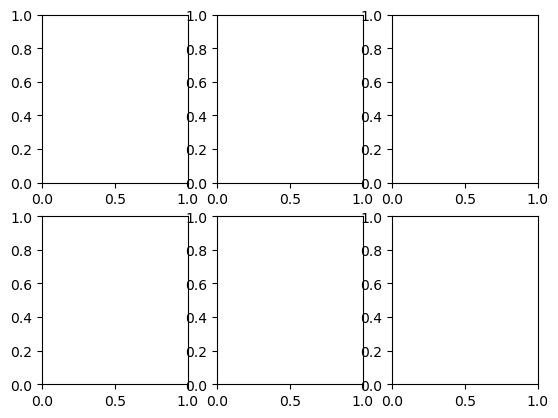

In [7]:
 _ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
fig, axes = plt.subplots(2, 3)
axes

# This is very useful as the axes array can be easily indexed like a two-dimensional array;
#  for example, axes[0, 1]. You can also indicate that subplots should have the same X
#  or Y axis using sharex and sharey, respectively. This is especially useful when comparing
#  data on the same scale; otherwise, matplotlib auto-scales plot limits independently.

In [8]:
#  Table 8-1. pyplot.subplots optionspg:223

In [9]:
# Adjusting the spacing around subplots

# The spacingcan be most easily changed using the subplots_adjust 
# Figure method, also available as a op-level function

# subplots_adjust(left=None, bottom=None, right=None, top=None,
#                 wspace=None, hspace=None)

#  wspace and hspace controls the percent of the figure width and figure height, respec
# tively, to use as spacing between subplots. Here is a small example:

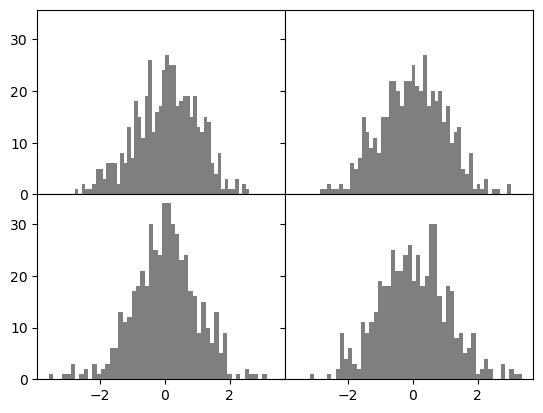

In [10]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
#  You may notice that the axis labels overlap. matplotlib doesn’t check whether the labels
#  overlap, so in a case like this you would need to fix the labels yourself by specifying
#  explicit tick locations and tick labels.

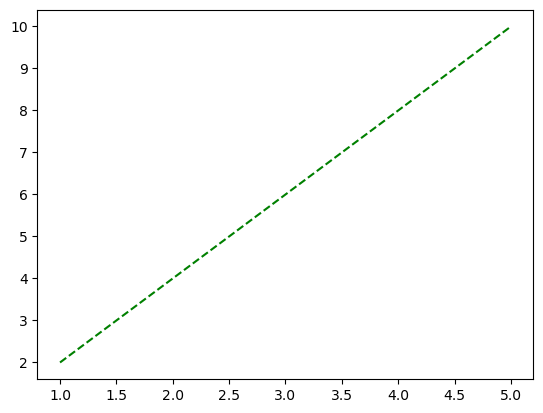

In [14]:
#  Colors, Markers, and Line Styles

# # Matplotlib’s main plot function accepts arrays of X and Y coordinates and optionally
#  a string abbreviation indicating color and line style.

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

fig,ax=plt.subplots()
ax.plot(x,y,linestyle='--',color='green')
plt.show()

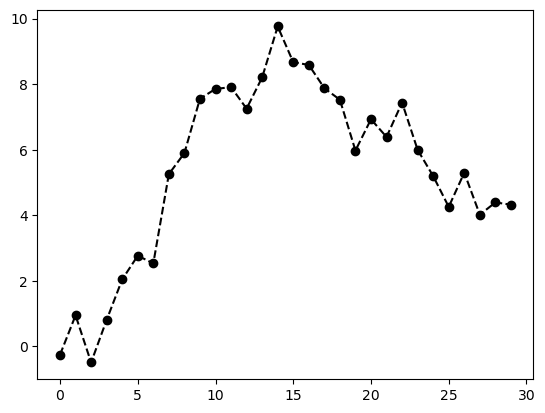

In [18]:
#  Line plots can additionally have markers to highlight the actual data points. Since mat
# plotlib creates a continuous line plot, interpolating between points, it can occasionally
#  be unclear where the points lie. The marker can be part of the style string, which must
#  have color followed by marker type and line style

plt.plot(randn(30).cumsum(), 'ko--')

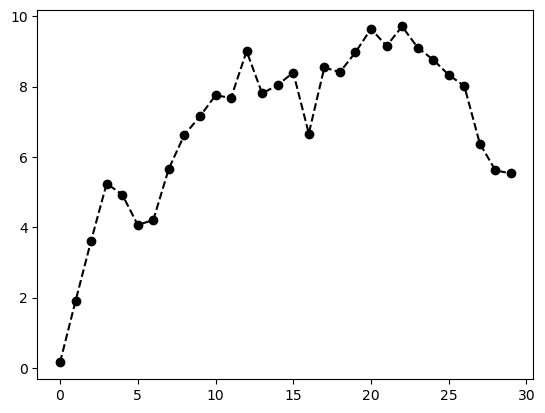

In [20]:
# This could also have been written more explicitly as:

plt.plot(randn(30).cumsum(),color='k',linestyle='dashed',marker='o')

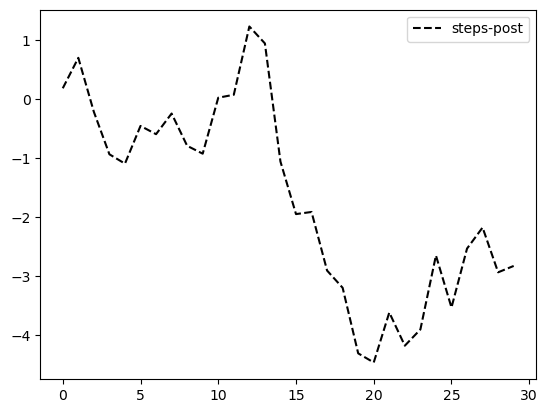

In [21]:
#  For line plots, you will notice that subsequent points are linearly interpolated by de
# fault. This can be altered with the drawstyle option:

data = randn(30).cumsum()
plt.plot(data, 'k--', label='steps-post')
plt.legend(loc='best')

In [ ]:
# Ticks, Labels, and Legends

# The pyplot interface, designed for interactive use, consists of methods like xlim,
#  xticks, and xticklabels.

(0.0, 10.0)

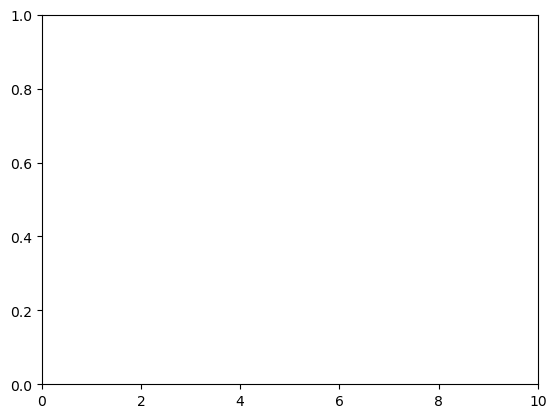

In [22]:
plt.xlim([0, 10])

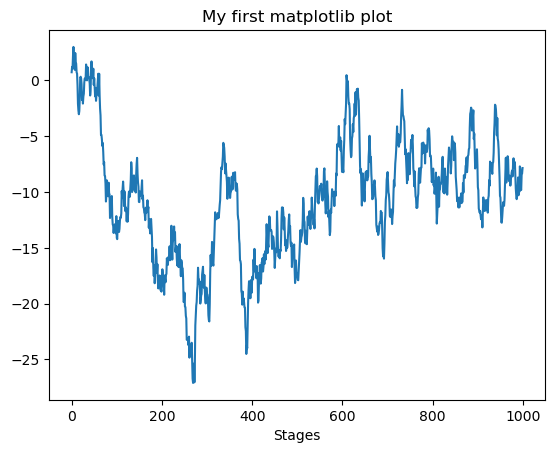

In [26]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.plot(randn(1000).cumsum())

In [25]:
#  Setting the title, axis labels, ticks, and ticklabel

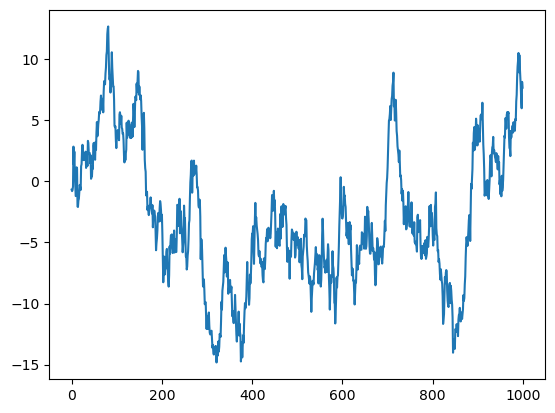

In [27]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

In [28]:
# Annotations and Drawing on a Subplot

# you may wish to draw your own plot annotations,
#  which could consist of text, arrows, or other shapes
    
# Annotations and text can be added using the text, arrow, and annotate functions.
#  text draws text at given coordinates (x, y) on the plot with optional custom styling:    

ax.text(x,y,'Hello World',family='monospace', fontsize=10)

Text([1, 2, 3, 4, 5], [2, 4, 6, 8, 10], 'Hello World')

FileNotFoundError: [Errno 2] No such file or directory: 'ch08/spx.csv'

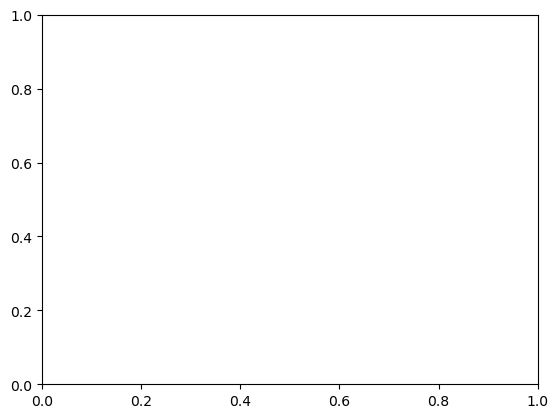

In [30]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
    xytext=(date, spx.asof(date) + 200),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='top')
 # Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in 2008-2009 financial crisis')

In [ ]:
# Saving Plots to File

In [ ]:
# The active figure can be saved to file using plt.savefig. This method is equivalent to
#  the figure object’s savefig instance method.

# plt.savefig('figpath.svg')

In [ ]:
#  The file type is inferred from the file extension. So if you used .pdf instead you would
#  get a PDF. There are a couple of important options that I use frequently for publishing
#  graphics: dpi, which controls the dots-per-inch resolution, and bbox_inches, which can
#  trim the whitespace around the actual figure. To get the same plot as a PNG above with
#  minimal whitespace around the plot and at 400 DPI, you would do:
        
# plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [ ]:
# Table 8-2. Figure.savefig options pg 231